<a href="https://colab.research.google.com/github/p-s-nayak/DL-NeuralNetwork-HUB/blob/main/08_Decision_boundary_for_regression_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# decision boundary plots using Python for both regression and classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


Regression – Neural Network without decision boundary

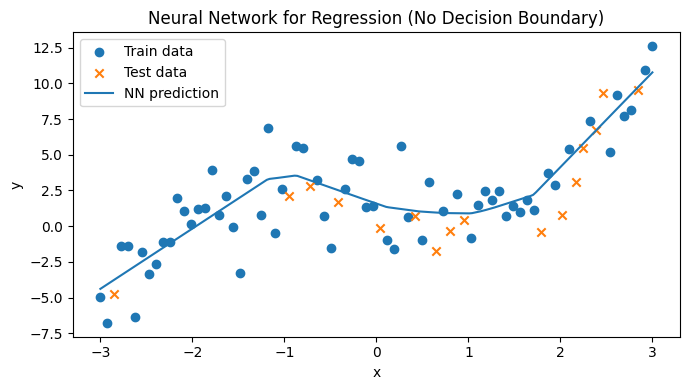

In [ ]:
# ----- 1. Create 1D regression data -----
rng = np.random.RandomState(0)
X = np.linspace(-3, 3, 80).reshape(-1, 1)
y = 0.5 * X[:, 0]**3 - X[:, 0] + 2 + rng.normal(scale=2.0, size=X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# ----- 2. Define and train regression NN -----
reg_nn = MLPRegressor(
    hidden_layer_sizes=(50, 50),
    activation='relu',
    max_iter=500,
    random_state=0
)
reg_nn.fit(X_train, y_train)

# ----- 3. Predict on a smooth grid -----
X_grid = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred = reg_nn.predict(X_grid)

# ----- 4. Plot -----
plt.figure(figsize=(7, 4))
plt.scatter(X_train, y_train, label="Train data")
plt.scatter(X_test, y_test, marker='x', label="Test data")
plt.plot(X_grid, y_pred, label="NN prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Neural Network for Regression (No Decision Boundary)")
plt.legend()
plt.tight_layout()
plt.show()


Classification – Neural Network with decision boundary

Train accuracy: 0.9825
Test  accuracy: 0.94


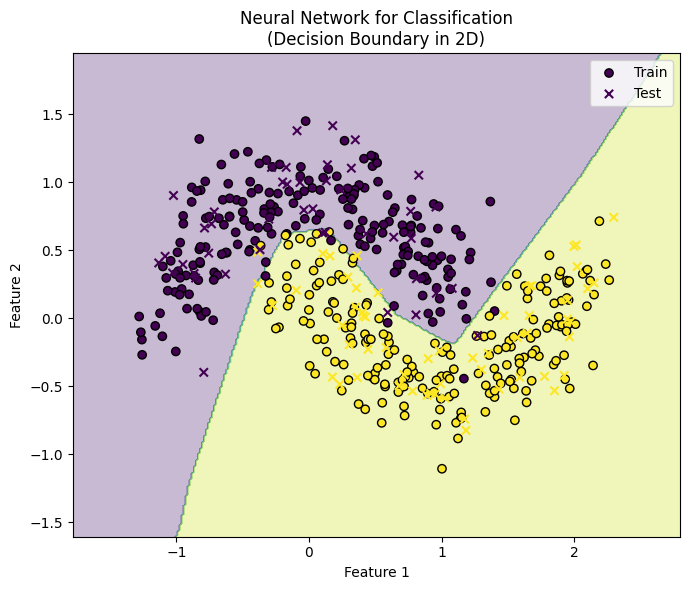

In [ ]:
# ----- 1. Create 2D classification data -----
X, y = make_moons(n_samples=500, noise=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# ----- 2. Define and train classification NN -----
clf_nn = MLPClassifier(
    hidden_layer_sizes=(20, 20),
    activation='relu',
    max_iter=2000,
    random_state=0
)
clf_nn.fit(X_train, y_train)

print("Train accuracy:", clf_nn.score(X_train, y_train))
print("Test  accuracy:", clf_nn.score(X_test, y_test))

# ----- 3. Create a grid over the 2D space -----
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class over the grid
Z = clf_nn.predict(grid_points)
Z = Z.reshape(xx.shape)

# ----- 4. Plot decision boundary + points -----
plt.figure(figsize=(7, 6))

# Filled contour for decision regions
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker="x", label="Test")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network for Classification\n(Decision Boundary in 2D)")
plt.legend()
plt.tight_layout()
plt.show()
